# General

In [1]:
!nvidia-smi

Tue Dec 27 14:36:13 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 465.19.01    CUDA Version: 11.3     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA Quadro P620  On   | 00000000:01:00.0  On |                  N/A |
| 36%   51C    P0    N/A /  N/A |    781MiB /  1986MiB |     15%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 158
model name	: Intel(R) Core(TM) i7-8700 CPU @ 3.20GHz
stepping	: 10
microcode	: 0xf0
cpu MHz		: 4300.041
cache size	: 12288 KB
physical id	: 0
siblings	: 12
core id		: 0
cpu cores	: 6
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 22
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush dts acpi mmx fxsr sse sse2 ss ht tm pbe syscall nx pdpe1gb rdtscp lm constant_tsc art arch_perfmon pebs bts rep_good nopl xtopology nonstop_tsc cpuid aperfmperf pni pclmulqdq dtes64 monitor ds_cpl vmx smx est tm2 ssse3 sdbg fma cx16 xtpr pdcm pcid sse4_1 sse4_2 x2apic movbe popcnt tsc_deadline_timer aes xsave avx f16c rdrand lahf_lm abm 3dnowprefetch cpuid_fault epb invpcid_single pti ssbd ibrs ibpb stibp tpr_shadow vnmi flexpriority ept vpid ept_ad fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm mpx rdseed adx smap clflushopt intel_pt xsaveopt xsavec x

In [3]:
!bash make.cmd

main.cu(8): warning: conversion from a string literal to "char *" is deprecated

main.cu(8): warning: conversion from a string literal to "char *" is deprecated

main.cu(8): warning: conversion from a string literal to "char *" is deprecated

main.cu(8): warning: conversion from a string literal to "char *" is deprecated



In [4]:
import os
import cv2
import math
import hashlib
import numpy as np
import matplotlib.pyplot as plt

from tqdm.notebook import *

plt.rcParams['figure.figsize'] = [15, 16]

In [5]:
def timeCapture(cmd, times = 1):
    return [float(os.popen(cmd).read().strip()) for i in range(times)]

In [6]:
def change_brightness(img, value=30):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    v = cv2.add(v,value)
    v[v > 255] = 255
    v[v < 0] = 0
    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

def readImage(file):
    return cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2RGB)

def getVisualize(file, bins = list(range(257))):
    image = cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2HSV)
    hist = np.histogram(image[:,:,2].flatten(), bins=bins)[0]
    x = np.array(bins[:-1])
    y = np.array([0.0]*len(x))
    for i in bins[:-1]:
        x[i] = i
        y[i] = y[i-1] + hist[i]
    y = y*max(hist)/max(y)
    
    return image[:,:,2].flatten(), (x, y)

<Figure size 1080x1152 with 0 Axes>

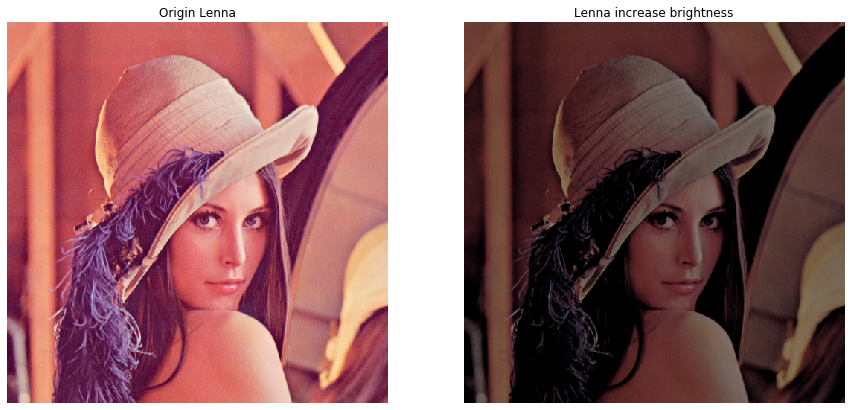

In [7]:
image = cv2.cvtColor(cv2.imread("images/Lenna.png"), cv2.COLOR_BGR2RGB)
image_brightness = change_brightness(image, -120)
cv2.imwrite("images/Lenna_brightness.png", cv2.cvtColor(image_brightness, cv2.COLOR_RGB2BGR))

plt.figure()
f, axarr = plt.subplots(1,2)
axarr[0].imshow(image)
axarr[0].set_title("Origin Lenna")
axarr[0].axis('off')

axarr[1].imshow(image_brightness)
axarr[1].set_title("Lenna increase brightness")
axarr[1].axis('off')

plt.show()

# Check equal

## MaxAbsScaler

In [8]:
os.popen("./main images/Chateau.png images/Chateau_CPU_0.png 0 256 0 8 1 1 8 1 1").read()
os.popen("./main images/Chateau.png images/Chateau_GPU_0.png 0 256 1 8 1 1 8 1 1").read()

os.popen("./main images/palais_garnier.jpg images/palais_garnier_CPU_0.jpg 0 256 0 8 1 1 8 1 1").read()
os.popen("./main images/palais_garnier.jpg images/palais_garnier_GPU_0.jpg 0 256 1 8 1 1 8 1 1").read()

print("Chateau_CPU:", hashlib.md5(open('images/Chateau_CPU_0.png','rb').read()).hexdigest())
print("Chateau_GPU:", hashlib.md5(open('images/Chateau_GPU_0.png','rb').read()).hexdigest())

print("palais_garnier_CPU:", hashlib.md5(open('images/palais_garnier_CPU_0.jpg','rb').read()).hexdigest())
print("palais_garnier_GPU:", hashlib.md5(open('images/palais_garnier_GPU_0.jpg','rb').read()).hexdigest())

Chateau_CPU: 7f698b2c308e2b3a4c2fb264f21360c7
Chateau_GPU: 7f698b2c308e2b3a4c2fb264f21360c7
palais_garnier_CPU: 8beee4e1cac3512c9ebb9f736b8e4a52
palais_garnier_GPU: 8beee4e1cac3512c9ebb9f736b8e4a52


## MinMaxScaler

In [9]:
os.popen("./main images/Chateau.png images/Chateau_CPU_1.png 1 256 0 8 1 1 8 1 1").read()
os.popen("./main images/Chateau.png images/Chateau_GPU_1.png 1 256 1 8 1 1 8 1 1").read()

os.popen("./main images/palais_garnier.jpg images/palais_garnier_CPU_1.jpg 1 256 0 8 1 1 8 1 1").read()
os.popen("./main images/palais_garnier.jpg images/palais_garnier_GPU_1.jpg 1 256 1 8 1 1 8 1 1").read()

print("Chateau_CPU:", hashlib.md5(open('images/Chateau_CPU_1.png','rb').read()).hexdigest())
print("Chateau_GPU:", hashlib.md5(open('images/Chateau_GPU_1.png','rb').read()).hexdigest())

print("palais_garnier_CPU:", hashlib.md5(open('images/palais_garnier_CPU_1.jpg','rb').read()).hexdigest())
print("palais_garnier_GPU:", hashlib.md5(open('images/palais_garnier_GPU_1.jpg','rb').read()).hexdigest())

Chateau_CPU: 7f698b2c308e2b3a4c2fb264f21360c7
Chateau_GPU: 7f698b2c308e2b3a4c2fb264f21360c7
palais_garnier_CPU: 23baaefcdc8477db735f9990630b5abc
palais_garnier_GPU: 23baaefcdc8477db735f9990630b5abc


# Visualize

## Chateau

<Figure size 1080x1152 with 0 Axes>

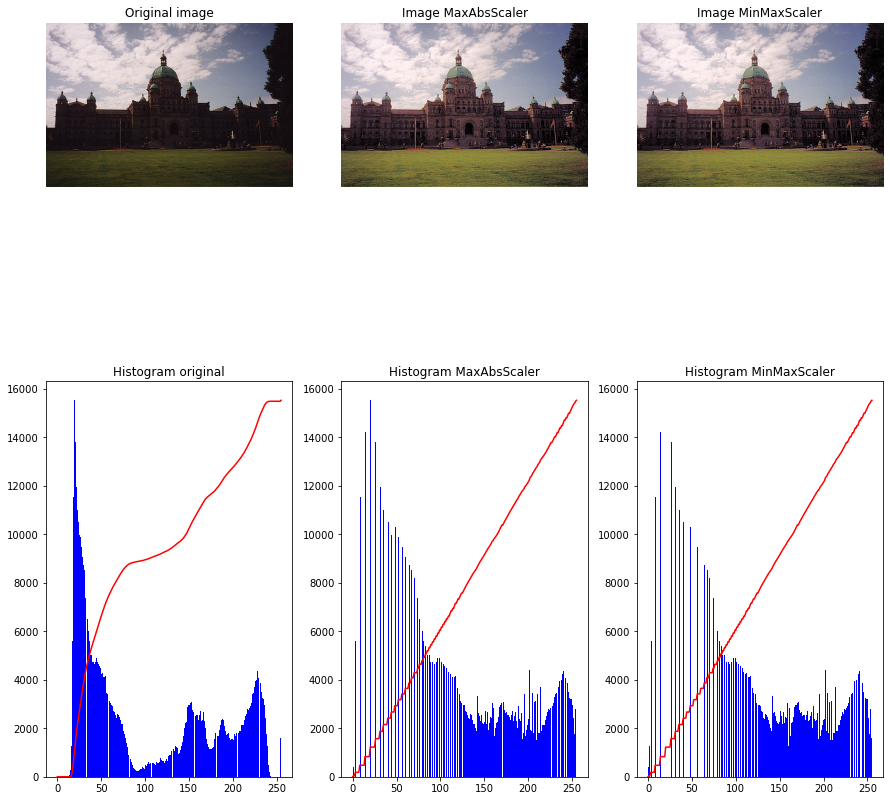

In [10]:
file = "images/Chateau.png"
fileMax = "images/Chateau_GPU_0.png"
fileMin = "images/Chateau_GPU_1.png"
plt.figure()
f, axarr = plt.subplots(2,3)

image = readImage(file)
axarr[0, 0].imshow(image)
axarr[0, 0].axis('off')
axarr[0, 0].set_title("Original image")

imageMax = readImage(fileMax)
axarr[0, 1].imshow(imageMax)
axarr[0, 1].axis('off')
axarr[0, 1].set_title("Image MaxAbsScaler")

imageMin = readImage(fileMin)
axarr[0, 2].imshow(imageMin)
axarr[0, 2].axis('off')
axarr[0, 2].set_title("Image MinMaxScaler")


vis = getVisualize(file)
axarr[1, 0].plot(vis[1][0], vis[1][1], color = 'red')
axarr[1, 0].hist(vis[0], bins=256, color = 'blue')
axarr[1, 0].set_title("Histogram original")

visMax = getVisualize(fileMax)
axarr[1, 1].plot(visMax[1][0], visMax[1][1], color = 'red')
axarr[1, 1].hist(visMax[0], bins=256, color = 'blue')
axarr[1, 1].set_title("Histogram MaxAbsScaler")

visMin = getVisualize(fileMin)
axarr[1, 2].plot(visMin[1][0], visMin[1][1], color = 'red')
axarr[1, 2].hist(visMin[0], bins=256, color = 'blue')
axarr[1, 2].set_title("Histogram MinMaxScaler")

plt.show()

## palais garnier

<Figure size 1080x1152 with 0 Axes>

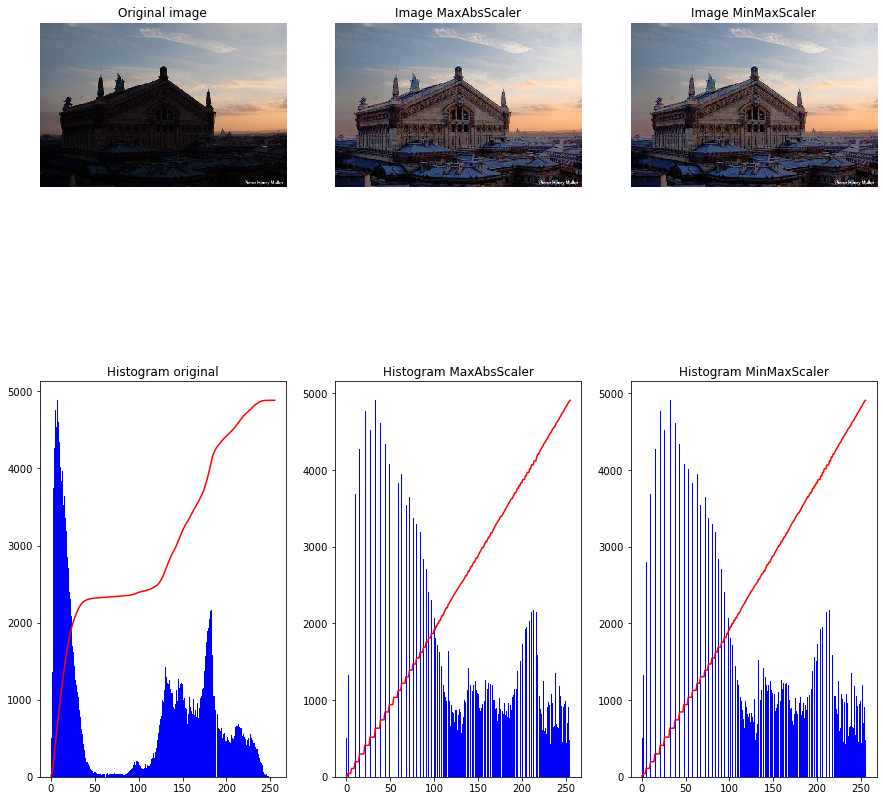

In [11]:
file = "images/palais_garnier.jpg"
fileMax = "images/palais_garnier_GPU_0.jpg"
fileMin = "images/palais_garnier_GPU_1.jpg"
plt.figure()
f, axarr = plt.subplots(2,3)

image = readImage(file)
axarr[0, 0].imshow(image)
axarr[0, 0].axis('off')
axarr[0, 0].set_title("Original image")

imageMax = readImage(fileMax)
axarr[0, 1].imshow(imageMax)
axarr[0, 1].axis('off')
axarr[0, 1].set_title("Image MaxAbsScaler")

imageMin = readImage(fileMin)
axarr[0, 2].imshow(imageMin)
axarr[0, 2].axis('off')
axarr[0, 2].set_title("Image MinMaxScaler")


vis = getVisualize(file)
axarr[1, 0].plot(vis[1][0], vis[1][1], color = 'red')
axarr[1, 0].hist(vis[0], bins=256, color = 'blue')
axarr[1, 0].set_title("Histogram original")

visMax = getVisualize(fileMax)
axarr[1, 1].plot(visMax[1][0], visMax[1][1], color = 'red')
axarr[1, 1].hist(visMax[0], bins=256, color = 'blue')
axarr[1, 1].set_title("Histogram MaxAbsScaler")

visMin = getVisualize(fileMin)
axarr[1, 2].plot(visMin[1][0], visMin[1][1], color = 'red')
axarr[1, 2].hist(visMin[0], bins=256, color = 'blue')
axarr[1, 2].set_title("Histogram MinMaxScaler")

plt.show()

## Lenna

In [12]:
os.popen("./main images/Lenna_brightness.png images/Lenna_brightness_GPU_0.png 0 256 1 2 8 2 1 8 2").read()
os.popen("./main images/Lenna_brightness.png images/Lenna_brightness_GPU_1.png 1 256 1 2 8 2 1 8 2").read()

'4.52477\n'

<Figure size 1080x1152 with 0 Axes>

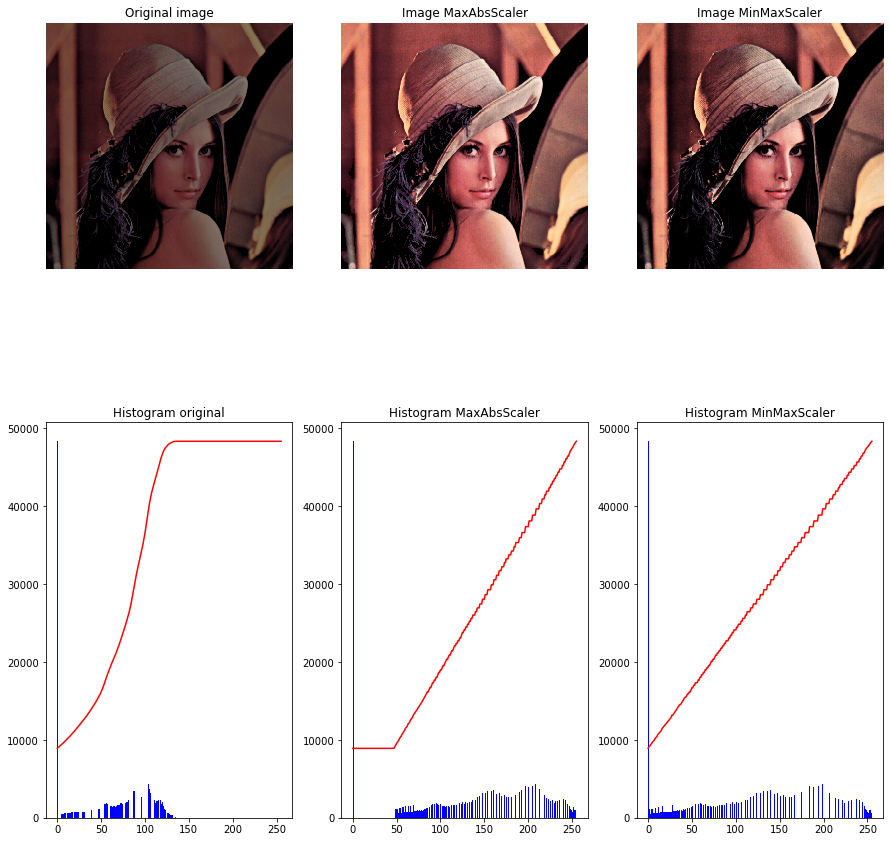

In [13]:
file = "images/Lenna_brightness.png"
fileMax = "images/Lenna_brightness_GPU_0.png"
fileMin = "images/Lenna_brightness_GPU_1.png"
plt.figure()
f, axarr = plt.subplots(2,3)

image = readImage(file)
axarr[0, 0].imshow(image)
axarr[0, 0].axis('off')
axarr[0, 0].set_title("Original image")

imageMax = readImage(fileMax)
axarr[0, 1].imshow(imageMax)
axarr[0, 1].axis('off')
axarr[0, 1].set_title("Image MaxAbsScaler")

imageMin = readImage(fileMin)
axarr[0, 2].imshow(imageMin)
axarr[0, 2].axis('off')
axarr[0, 2].set_title("Image MinMaxScaler")


vis = getVisualize(file)
axarr[1, 0].plot(vis[1][0], vis[1][1], color = 'red')
axarr[1, 0].hist(vis[0], bins=256, color = 'blue')
axarr[1, 0].set_title("Histogram original")

visMax = getVisualize(fileMax)
axarr[1, 1].plot(visMax[1][0], visMax[1][1], color = 'red')
axarr[1, 1].hist(visMax[0], bins=256, color = 'blue')
axarr[1, 1].set_title("Histogram MaxAbsScaler")

visMin = getVisualize(fileMin)
axarr[1, 2].plot(visMin[1][0], visMin[1][1], color = 'red')
axarr[1, 2].hist(visMin[0], bins=256, color = 'blue')
axarr[1, 2].set_title("Histogram MinMaxScaler")

plt.show()

In [14]:
thread_time = {}
times = 2
for gridDimx in [0, 5, 10]:
    for gridDimy in [0]:
        for gridDimz in [0, 4]:
            for blockDimx in [0, 3]:
                for blockDimy in [0, 2]:
                    for blockDimz in [0, 3]:
                        cmd = f"./main images/Chateau.png images/temp.png 1 256 1 {2**gridDimx} {2**gridDimy} {2**gridDimz} {2**blockDimx} {2**blockDimy} {2**blockDimz}"
                        result = timeCapture(cmd, times)
                        print("Command:", cmd, "Time:", result)
                        if (gridDimx+gridDimy+gridDimz+blockDimx+blockDimy+blockDimz) in thread_time:
                            thread_time[(gridDimx+gridDimy+gridDimz+blockDimx+blockDimy+blockDimz)] += result
                        else:
                            thread_time[(gridDimx+gridDimy+gridDimz+blockDimx+blockDimy+blockDimz)] = result

Command: ./main images/Chateau.png images/temp.png 1 256 1 1 1 1 1 1 1 Time: [1933.6, 1908.07]
Command: ./main images/Chateau.png images/temp.png 1 256 1 1 1 1 1 1 8 Time: [281.911, 280.655]
Command: ./main images/Chateau.png images/temp.png 1 256 1 1 1 1 1 4 1 Time: [546.582, 548.079]
Command: ./main images/Chateau.png images/temp.png 1 256 1 1 1 1 1 4 8 Time: [75.1838, 76.6809]
Command: ./main images/Chateau.png images/temp.png 1 256 1 1 1 1 8 1 1 Time: [279.039, 278.652]
Command: ./main images/Chateau.png images/temp.png 1 256 1 1 1 1 8 1 8 Time: [38.7238, 39.2041]
Command: ./main images/Chateau.png images/temp.png 1 256 1 1 1 1 8 4 1 Time: [75.8082, 75.9214]
Command: ./main images/Chateau.png images/temp.png 1 256 1 1 1 1 8 4 8 Time: [13.2753, 12.7271]
Command: ./main images/Chateau.png images/temp.png 1 256 1 1 1 16 1 1 1 Time: [137.027, 136.512]
Command: ./main images/Chateau.png images/temp.png 1 256 1 1 1 16 1 1 8 Time: [19.7271, 19.5248]
Command: ./main images/Chateau.png imag

In [15]:
time_cpu = timeCapture("./main images/Chateau.png images/temp.png 1 256 0", 5)

In [16]:
timeCapture("./main images/Chateau.png images/temp.png 1 256 0", 5)

[50.2, 63.421, 58.312, 49.822, 62.139]

In [17]:
x_threads = []
y_times = []
for k, v in sorted(thread_time.items(), key = lambda x:x[0]):
    print(f"Total threads: {k}\nTime: {v}(mean: {np.mean(v)})")
    x_threads.append(k)
    y_times.append(np.mean(v))

Total threads: 0
Time: [1933.6, 1908.07](mean: 1920.835)
Total threads: 2
Time: [546.582, 548.079](mean: 547.3305)
Total threads: 3
Time: [281.911, 280.655, 279.039, 278.652](mean: 280.06425)
Total threads: 4
Time: [137.027, 136.512](mean: 136.7695)
Total threads: 5
Time: [75.1838, 76.6809, 75.8082, 75.9214, 74.8355, 72.9382](mean: 75.228)
Total threads: 6
Time: [38.7238, 39.2041, 37.3345, 36.7049](mean: 37.991825)
Total threads: 7
Time: [19.7271, 19.5248, 19.6974, 19.5974, 20.2929, 19.8742](mean: 19.785633333333333)
Total threads: 8
Time: [13.2753, 12.7271, 9.38115, 9.37757, 12.5479, 9.41443](mean: 11.120575)
Total threads: 9
Time: [5.69731, 7.89555, 8.51021, 6.11139, 40.7312, 41.6077](mean: 18.42556)
Total threads: 10
Time: [4.44832, 3.64742, 3.59402, 4.48182, 3.68336, 3.64627, 40.3159, 40.9193](mean: 13.092051249999997)
Total threads: 11
Time: [2.8471, 5.67114, 10.1259, 12.8832](mean: 7.881835000000001)
Total threads: 12
Time: [5.12429, 3.77472, 7.47686, 6.17939, 8.61392, 7.79914, 1

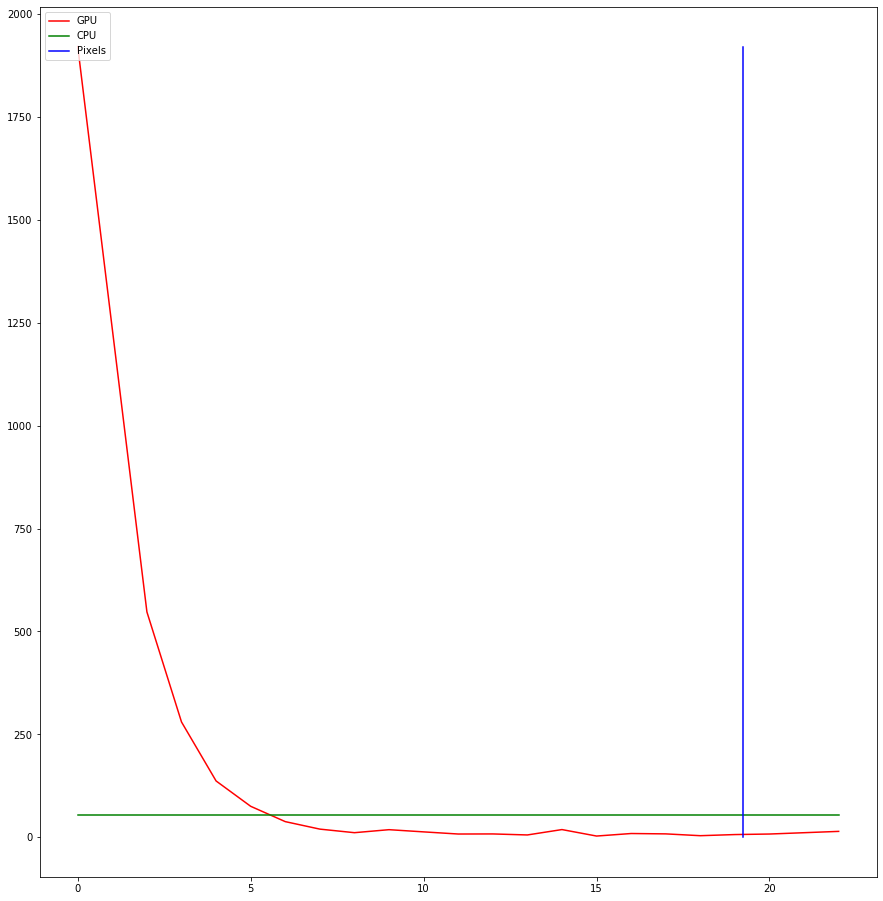

In [18]:
plt.plot(x_threads, y_times, color = 'red', label = "GPU")
plt.plot([0, max(x_threads)], [np.mean(time_cpu)]*2, color = "green", label = "CPU")
plt.plot([math.log2(961*640)]*2, [0, max(y_times)], color = 'blue', label = "Pixels")
plt.legend(loc="upper left")
plt.show()

In [19]:
times = 2
for gridDims in range(0, 12, 2):
    for blockDims in range(0, 10, 2):
        cmd = f"./main images/Chateau.png images/temp.png 1 256 1 {2**gridDims} 1 1 {2**blockDims} 1 1"
        result = timeCapture(cmd, times)
        print(gridDims, blockDims, "Time:", np.mean(result))

0 0 Time: 1921.275
0 2 Time: 538.156
0 4 Time: 142.677
0 6 Time: 38.617
0 8 Time: 12.6888
2 0 Time: 497.3625
2 2 Time: 138.78199999999998
2 4 Time: 39.0526
2 6 Time: 10.22535
2 8 Time: 3.67621
4 0 Time: 137.3465
4 2 Time: 36.7098
4 4 Time: 10.793495
4 6 Time: 3.972115
4 8 Time: 2.9312449999999997
6 0 Time: 46.859300000000005
6 2 Time: 13.2358
6 4 Time: 3.932575
6 6 Time: 3.192925
6 8 Time: 3.501855
8 0 Time: 36.5914
8 2 Time: 10.92005
8 4 Time: 3.741025
8 6 Time: 2.698605
8 8 Time: 2.4208
10 0 Time: 37.284099999999995
10 2 Time: 9.390145
10 4 Time: 4.179615
10 6 Time: 2.379265
10 8 Time: 2.889665
